In [37]:
import numpy as np
import glob
# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from astropy.io import fits

In [38]:
# Open the FITS file
filename = "bias01.fits"
with fits.open(filename) as hdul:
    data = hdul[0].data

hdu_list = fits.open(filename)
hdu_list.info()

Filename: bias01.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     155   (1056, 1024)   int16 (rescales to uint16)   


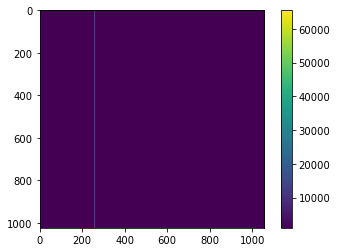

In [39]:
plt.imshow(data)
plt.colorbar()

<class 'numpy.ndarray'>
(1081344,)


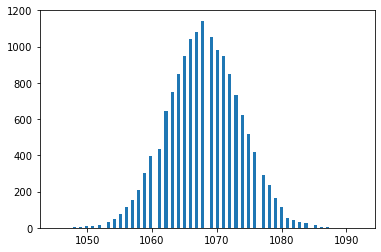

In [51]:
# Generate and show the histogram
print(type(data.flatten()))
print(data.flatten().shape)
histogram = plt.hist(data[:,15:30].flatten(), bins=100)
plt.savefig('histogram.png')
plt.show()

In [99]:
# Find all files matching the pattern "bias*.fits"
filenames = sorted(glob.glob("bias*.fits"))
print(filenames)

['bias01.fits', 'bias02.fits', 'bias03.fits', 'bias04.fits', 'bias05.fits']


['bias01.fits', 'bias02.fits', 'bias03.fits', 'bias04.fits', 'bias05.fits']
<class 'numpy.ndarray'>
(1024, 1056)


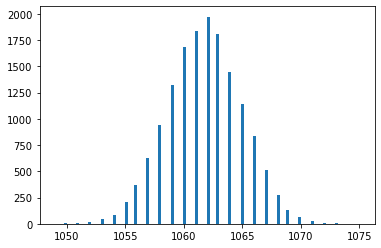

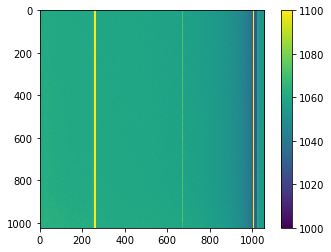

In [169]:
# Find all files matching the pattern "bias*.fits"
filenames = sorted(glob.glob("bias*.fits"))
print(filenames)
# Open the FITS files and read the data
data_bias = []
for filename in filenames:
    with fits.open(filename) as hdul:
        data_bias.append(hdul[0].data)

# Take the median of the data
median_bias = np.median(data_bias, axis=0)

# Print some info about the data
print(type(median_bias))
print(median_bias.shape)
# Generate and show the histogram

histogram = plt.hist(median_bias[:,15:30].flatten(), bins=100)
plt.show()
# Show the image and colorbar
plt.imshow(median_bias, vmin=1000, vmax=1100)##cmap=viridis (default)
plt.colorbar() 
plt.savefig('master_bias.png')

['dark01.fits', 'dark02.fits', 'dark03.fits', 'dark04.fits', 'dark05.fits']
<class 'numpy.ndarray'>
(1024, 1056)


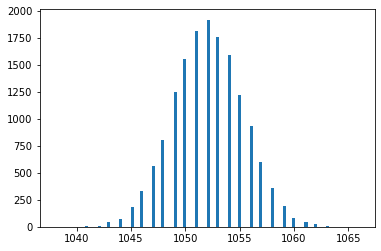

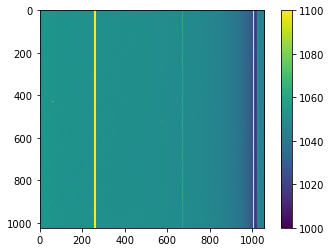

In [123]:
# Find all files matching the pattern "dark*.fits"
filenames1 = sorted(glob.glob("dark*.fits"))
print(filenames1)
# Open the FITS files and read the data
data_dark = []
for filename in filenames1:
    with fits.open(filename) as hdul:
        data_dark.append(hdul[0].data)

# Take the median of the data
median_dark = np.median(data_dark, axis=0)

# Print some info about the data
print(type(median_dark))
print(median_dark.shape)
# Generate and show the histogram
histogram = plt.hist(median_dark[:,15:30].flatten(), bins=100)
plt.show()
# Show the image and colorbar
plt.imshow(median_dark, vmin=1000, vmax=1100)##cmap=viridis (default)
plt.colorbar() 
plt.savefig('master_dark.png')

['flat01.fits', 'flat02.fits', 'flat03.fits', 'flat04.fits', 'flat05.fits']
<class 'numpy.ndarray'>
(1024, 1056)


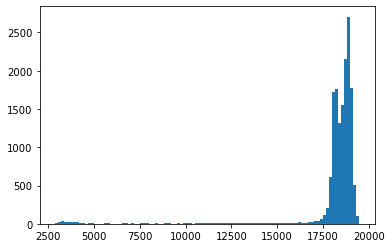

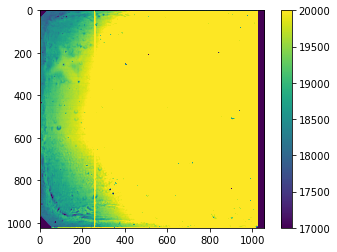

In [168]:
# Find all files matching the pattern "flat*.fits"
filenames = sorted(glob.glob("flat*.fits"))
print(filenames)
# Open the FITS files and read the data
data_flat = []
for filename in filenames:
    with fits.open(filename) as hdul:
        data_flat.append(hdul[0].data)

# Take the median of the data
median_flat = np.median(data_flat, axis=0)

# Print some info about the data
print(type(median_flat))
print(median_flat.shape)
# Generate and show the histogram
histogram = plt.hist(median_flat[:,15:30].flatten(), bins=100)
plt.show()
# Show the image and colorbar
plt.imshow(median_flat, vmin=17000, vmax=20000)##cmap=viridis (default)
plt.colorbar() 
plt.savefig('master_flat.png')

In [ ]:
# Generate and show the histogram

histogram = plt.hist(median_data[:,15:30].flatten(), bins='auto')
plt.show()

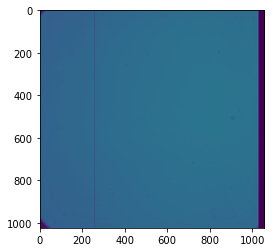

In [132]:
clean_flat=median_flat-median_bias
plt.imshow(clean_flat)
plt.savefig('clean_flat')

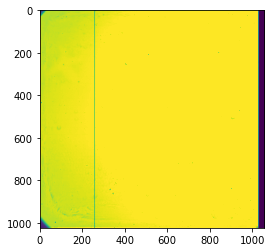

In [176]:
# Normalize the image to its mean value
mean_val = np.mean(clean_flat)
normalized_clean_flat = clean_flat / mean_val


plt.imshow(normalized_clean_flat, vmin=0, vmax=1)

In [140]:
hdulist=fits.open('science01.fits')
hdulist.info()

Filename: science01.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     155   (1056, 1024)   int16 (rescales to uint16)   


['science01.fits', 'science02.fits', 'science03.fits', 'science04.fits', 'science05.fits']
[[-7.4        -7.56666667 -7.6        ... -7.83333333 -7.43333333
  -7.76666667]
 [-7.06666667 -7.56666667 -7.33333333 ... -7.56666667 -7.46666667
  -7.7       ]
 [-7.         -7.5        -7.3        ... -8.         -7.43333333
  -7.46666667]
 ...
 [-7.43333333 -7.8        -7.63333333 ... -7.8        -7.83333333
  -7.6       ]
 [-7.8        -7.66666667 -7.6        ... -7.66666667 -8.03333333
  -7.63333333]
 [-7.6        -7.63333333 -7.56666667 ... -7.8        -7.63333333
  -7.56666667]]


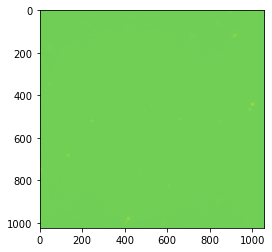

In [177]:
##open science files
filenames = sorted(glob.glob("science*.fits"))
print(filenames)
# Create empty lists for each science file

persec_tot=[]
# Loop over the science files
for filename in filenames:
    # Load the science image
    sci_data = fits.getdata(filename)
    
    # Subtract the master bias
    clean_sci = sci_data - median_bias
    
    # Divide by the exposure time to get counts/sec
    exptime = fits.getheader(filename)['EXPTIME']
    persec_sci = clean_sci / exptime
    
    # Append to the all_persec_science list
    persec_tot.append(persec_sci)
    
    
    
median_persec=np.median(persec_tot, axis=0)
plt.imshow(median_persec)
print(median_persec)




/var/folders/s9/73jhyk5177j89b5m6w1ms3ch0000gn/T/ipykernel_45691/4114613777.py:1: RuntimeWarning: divide by zero encountered in true_divide
  calibrated_science=median_persec/normalized_clean_flat
/var/folders/s9/73jhyk5177j89b5m6w1ms3ch0000gn/T/ipykernel_45691/4114613777.py:1: RuntimeWarning: invalid value encountered in true_divide
  calibrated_science=median_persec/normalized_clean_flat


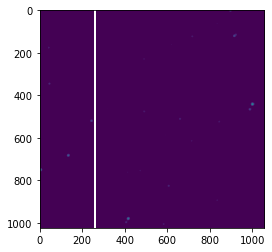

In [179]:
calibrated_science=median_persec/normalized_clean_flat
plt.imshow(calibrated_science, vmin=0)